In [4]:
import pandas as pd
import numpy as np
import csv

In [5]:
# Load the dataset
data = pd.read_csv('api_call_sequence.csv')

In [6]:
# View first five raw
data.head()

,hash,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,...,t_91,t_92,t_93,t_94,t_95,t_96,t_97,t_98,t_99,malware
0,071e8c3f8922e186e57548cd4c703a5d,112,274,158,215,274,158,215,298,76,...,71,297,135,171,215,35,208,56,71,1
1,33f8e6d08a6aae939f25a8e0d63dd523,82,208,187,208,172,117,172,117,172,...,81,240,117,71,297,135,171,215,35,1
2,b68abd064e975e1c6d5f25e748663076,16,110,240,117,240,117,240,117,240,...,65,112,123,65,112,123,65,113,112,1
3,72049be7bd30ea61297ea624ae198067,82,208,187,208,172,117,172,117,172,...,208,302,208,302,187,208,302,228,302,1
4,c9b3700a77facf29172f32df6bc77f48,82,240,117,240,117,240,117,240,117,...,209,260,40,209,260,141,260,141,260,1


In [7]:
# Checking and removing NULL values
data.isnull().sum()

hash       0
t_0        0
t_1        0
t_2        0
t_3        0
          ..
t_96       0
t_97       0
t_98       0
t_99       0
malware    0
Length: 102, dtype: int64

In [8]:
data.describe()

,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,...,t_91,t_92,t_93,t_94,t_95,t_96,t_97,t_98,t_99,malware
count,43876.000000,43876.000000,43876.000000,43876.000000,43876.000000,43876.000000,43876.000000,43876.000000,43876.000000,43876.000000,...,43876.000000,43876.000000,43876.000000,43876.000000,43876.000000,43876.000000,43876.000000,43876.000000,43876.000000,43876.000000
mean,142.830226,211.477414,148.217294,189.045674,187.514746,174.190218,170.290022,199.070015,142.659016,167.358921,...,154.448332,173.219459,159.951568,164.615074,173.637159,152.397848,158.442543,160.717203,155.788199,0.975408
std,75.599441,60.082481,47.667868,68.119087,71.196556,65.713664,55.469501,65.474790,66.756934,53.440972,...,78.342789,82.696235,74.248027,70.240283,70.632812,79.819427,78.142193,74.979008,79.068212,0.154880
min,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,82.000000,172.000000,117.000000,117.000000,117.000000,117.000000,117.000000,159.000000,117.000000,117.000000,...,81.000000,117.000000,114.000000,117.000000,117.000000,89.000000,100.000000,108.000000,75.250000,1.000000
50%,82.000000,240.000000,158.000000,215.000000,172.000000,158.000000,172.000000,215.000000,117.000000,172.000000,...,141.000000,172.000000,141.000000,171.000000,172.000000,141.000000,171.000000,158.000000,141.000000,1.000000
75%,215.000000,240.000000,172.000000,240.000000,274.000000,240.000000,215.000000,240.000000,208.000000,208.000000,...,240.000000,260.000000,240.000000,215.000000,240.000000,215.000000,224.000000,226.000000,225.000000,1.000000
max,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,...,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,1.000000


In [10]:
data["malware"].value_counts()

1    42797
0     1079
Name: malware, dtype: int64

/home/kapilan/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='malware', ylabel='count'>

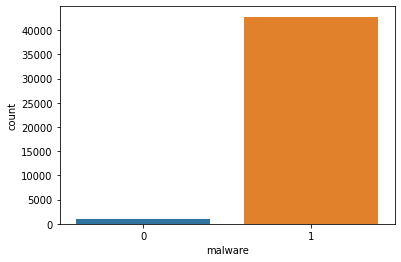

In [11]:
import seaborn as sns

# Distribution of Target variable
sns.countplot(data["malware"])

<AxesSubplot:>

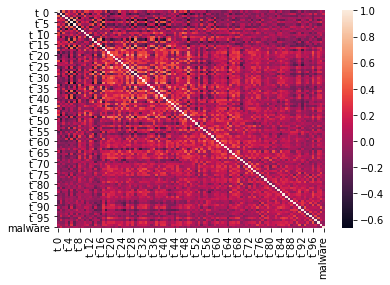

In [12]:
sns.heatmap(data.corr())

In [13]:
data['malware'].value_counts()

1    42797
0     1079
Name: malware, dtype: int64

In [17]:
X = data.drop(['hash', 'malware'], axis=1).values
y = data['malware'].values

print("X:",X.shape)
print("y:",y.shape)

X: (43876, 100)
y: (43876,)


# Feature selection using Trees Classifier

In [19]:
np.random.seed(1)
import sklearn.ensemble as ske
from sklearn.feature_selection import SelectFromModel

# Feature selection using Trees Classifier
fsel = ske.ExtraTreesClassifier().fit(X, y)
model = SelectFromModel(fsel, prefit=True)
X_new = model.transform(X)
nb_features = X_new.shape[1]

print('%i features identified as important:\n' % nb_features)

indices = np.argsort(fsel.feature_importances_)[::-1][:nb_features]
for f in range(nb_features):
    print("%d. feature %s (%f)" % (f + 1, data.columns[2+indices[f]], fsel.feature_importances_[indices[f]]))

25 features identified as important:

1. feature t_2 (0.047334)
2. feature t_76 (0.034478)
3. feature t_91 (0.026983)
4. feature t_77 (0.021018)
5. feature t_99 (0.017340)
6. feature t_1 (0.017305)
7. feature t_64 (0.016947)
8. feature t_90 (0.016034)
9. feature t_86 (0.015548)
10. feature t_44 (0.015369)
11. feature t_84 (0.015239)
12. feature t_3 (0.014427)
13. feature t_79 (0.014061)
14. feature t_80 (0.012935)
15. feature t_38 (0.012361)
16. feature t_47 (0.011968)
17. feature t_78 (0.011814)
18. feature t_81 (0.011776)
19. feature t_82 (0.011303)
20. feature t_10 (0.011105)
21. feature t_12 (0.010917)
22. feature t_53 (0.010880)
23. feature t_85 (0.010653)
24. feature t_69 (0.010626)
25. feature t_14 (0.010471)


In [20]:
# Take care of the feature order
features = []

for f in sorted(np.argsort(fsel.feature_importances_)[::-1][:nb_features]):
    features.append(data.columns[2+f])

In [21]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.20)
print("X_train: ",X_train.shape)
print("y_train: ",y_train.shape)
print("X_test: ",X_test.shape)
print("y_test: ",y_test.shape)

X_train:  (35100, 25)
y_train:  (35100,)
X_test:  (8776, 25)
y_test:  (8776,)


In [22]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

#Algorithm comparison
algorithms = {
        "GNB": GaussianNB(),
        "RandomForest": RandomForestClassifier(),
        "KNeighbors": KNeighborsClassifier(n_neighbors=2),
        "DecisionTree": DecisionTreeClassifier(max_depth=10),
        "AdaBoost": AdaBoostClassifier()
    }

for algo in algorithms:
    print(algo,':',algorithms[algo])

GNB : GaussianNB()
RandomForest : RandomForestClassifier()
KNeighbors : KNeighborsClassifier(n_neighbors=2)
DecisionTree : DecisionTreeClassifier(max_depth=10)
AdaBoost : AdaBoostClassifier()


In [23]:
results = {}
print("\nNow testing algorithms\n")
for algo in algorithms:
    clf = algorithms[algo]
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print("%s : %f %%" % (algo, score*100))
    results[algo] = score

winner = max(results, key=results.get)
print('\nWinner algorithm is %s with a %f %% success' % (winner, results[winner]*100))


Now testing algorithms

GNB : 93.664540 %
RandomForest : 99.042844 %
KNeighbors : 98.005925 %
DecisionTree : 98.826345 %
AdaBoost : 98.279398 %

Winner algorithm is RandomForest with a 99.042844 % success


[[ 139   73]
 [  11 8553]]


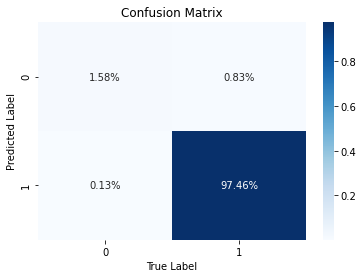

In [24]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Making the Confusion Matrix
clf = algorithms[winner]
res = clf.predict(X_test)
mt = confusion_matrix(y_test, res)
print(mt)

# Making the Confusion Matrix as Plot
sns.heatmap(mt/np.sum(mt), annot=True,fmt='.2%', cmap=plt.cm.Blues)
plt.ylabel('Predicted Label')
plt.xlabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('Confusion Matrix',dpi=300)

In [25]:
import pickle
import joblib

# Save the algorithm and the feature list for later predictions
print('Saving algorithm and feature list in classifier directory...')
joblib.dump(algorithms[winner], 'classifier.pkl')
open('features.pkl', 'wb').write(pickle.dumps(features))
print('Success')

Saving algorithm and feature list in classifier directory...
Success


In [26]:
# Testing with .pik file

clf_j = joblib.load('classifier.pkl')
y_predj = clf_j.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predj)
print(cm)

[[ 139   73]
 [  11 8553]]


# Individual Models

In [39]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Naive Bayes

In [40]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_test, y_test)

GaussianNB()

In [41]:
print(classification_report(y_test,gnb.predict(X_test)))
gn=gnb.score(X_test, y_test)

              precision    recall  f1-score   support

           0       0.21      0.40      0.28       212
           1       0.98      0.96      0.97      8564

    accuracy                           0.95      8776
   macro avg       0.60      0.68      0.63      8776
weighted avg       0.97      0.95      0.96      8776



# RANDOM FORREST CLASSIFIER

In [42]:
from sklearn.ensemble import RandomForestClassifier

rtclf=RandomForestClassifier()
rtclf.fit(X_test, y_test)

RandomForestClassifier()

In [43]:
print(classification_report(y_test,rtclf.predict(X_test)))
rt=rtclf.score(X_test, y_test)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       212
           1       1.00      1.00      1.00      8564

    accuracy                           1.00      8776
   macro avg       1.00      0.99      0.99      8776
weighted avg       1.00      1.00      1.00      8776



# KNN Classifier

In [44]:
from sklearn.neighbors import KNeighborsClassifier

knn=neigh = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [45]:
print(classification_report(y_test,knn.predict(X_test)))
kn=knn.score(X_test, y_test)

              precision    recall  f1-score   support

           0       0.59      0.56      0.57       212
           1       0.99      0.99      0.99      8564

    accuracy                           0.98      8776
   macro avg       0.79      0.77      0.78      8776
weighted avg       0.98      0.98      0.98      8776



# Decision Tree Classifier

In [46]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier(max_depth=10)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [47]:
print(classification_report(y_test,dtc.predict(X_test)))
dt=dtc.score(X_test, y_test)

              precision    recall  f1-score   support

           0       0.89      0.61      0.72       212
           1       0.99      1.00      0.99      8564

    accuracy                           0.99      8776
   macro avg       0.94      0.80      0.86      8776
weighted avg       0.99      0.99      0.99      8776



# AdaBoost Classifier

In [48]:
from sklearn.ensemble import AdaBoostClassifier

abc=AdaBoostClassifier()
abc.fit(X_train, y_train)

AdaBoostClassifier()

In [49]:
print(classification_report(y_test,abc.predict(X_test)))
ab=abc.score(X_test, y_test)

              precision    recall  f1-score   support

           0       0.72      0.47      0.57       212
           1       0.99      1.00      0.99      8564

    accuracy                           0.98      8776
   macro avg       0.85      0.73      0.78      8776
weighted avg       0.98      0.98      0.98      8776



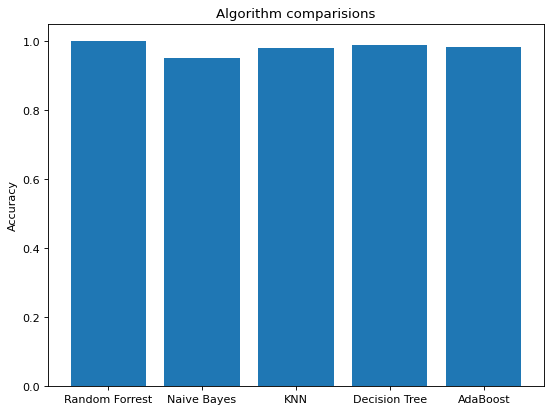

In [50]:
figure(figsize=(8, 6), dpi=80)
scores=[rt,gn,kn, dt, ab]
names=["Random Forrest","Naive Bayes","KNN", "Decision Tree", "AdaBoost"]
plt.bar(names,scores)
plt.ylabel("Accuracy")
plt.title("Algorithm comparisions")
plt.tick_params(axis="x",which="major",labelsize=10)